# Academic and Employability Factors influencing placement 

## Introduction 
Campus placement is a program organized by universities, colleges, and other educational institutions to help students who are nearing the end of their degree find jobs. In these events, companies that wish to recruit students, partner with educational institutions. The recruitment process usually entails companies and recruiters coming to campuses, conducting interviews, and giving out job offers to fit candidates. We often hear conflicting advice on what makes a fresh graduate stand out among other job seekers. As a university student, this can be both frustrating and disorganizing. In this assignment, I want to explore the factors influencing placement and employment and find good predictors of employment. To this avail, I will be exploring the data from MBA(Master of Business Administration) students at Jain University Bangalore. I will explore factors most commonly believed to influence employment, such as work experience, degree average, degree specialization, past grades, and employment tests conducted by the educational institution.

## Methods
### Data Collection

A subset of data of the MBA graduate students at Jain University Bangalore is publicly available on [kaggle.com](https://www.kaggle.com/)[1]

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
pd.set_option("future.no_silent_downcasting", True)

In [93]:
#load data
plc_df = pd.read_csv("Placement_Data_Full_Class.csv")

### Data Cleaning

The dataset contained vaguely named columns that had to be renamed and, some columns that were ambiguous and not crucial to our goal were dropped. Some abbreviations were present in some column values that were changed. Converted boolean data to a more conventional 0,1 representation. 

In [94]:
plc_df = plc_df.drop(["sl_no","ssc_b","hsc_b","salary","hsc_s","mba_p"],axis=1) # drop vague and irrelevant columns

plc_df = plc_df.rename(columns={"ssc_p": "grade10_mark", "hsc_p": "grade12_mark", "degree_p": "degree_mark", "degree_t": "undergrad_spec"
                       ,"specialisation" : "grad_spec", "etest_p": "employ_test", "workex" :"work_exp", "status": "placement"}) #rename columns 
plc_df = plc_df.replace({"work_exp" : { "No" : 0, "Yes" : 1}}) #bolean to 0,1 
plc_df = plc_df.replace({"placement" : { "Not Placed" : 0, "Placed" : 1}})#bolean to 0,1 

plc_df = plc_df.replace({"grad_spec":{ "Mkt&HR" : "Marketing&HR", "Mkt&Fin" : "Marketing&Finannce"}}) #change abbreviations 


## Analysis
I will explore the relationships between work experience, degree average, degree specialization, past grades, and employment test scores on placement(employment) with exploratory data analyses, consisting of statistical summaries and visualizations. 

### Distributions

First I will begin by looking at how our data is distributed. The pie chart below shows the percentage of male students to female students. As you can see the majority of the student population is male, almost double the female population. 

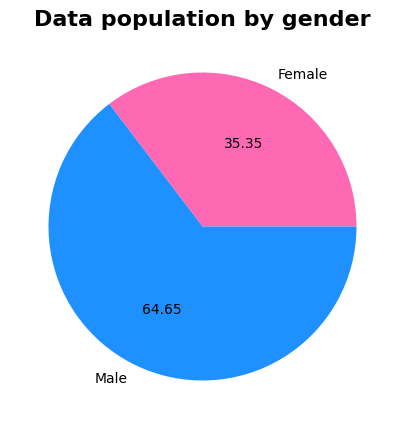

In [95]:
#Count of each gender in data set
gender_count= plc_df.groupby(["gender"])["placement"].count()

plt.figure(figsize=(5,5),dpi = 100)

pie_gender = plt.pie(gender_count,labels=["Female","Male"],autopct="%.2f", colors =['hotpink','dodgerblue'])

pie_title = plt.title("Data population by gender", fontdict={'fontweight' : 'bold','fontsize': 16})


As revealed by the nested pie chart below, the majority of our students specialize in *"Marketing and Finance"*, and an overwhelming majority of students have an undergraduate degree in *"Communication and Management"*.

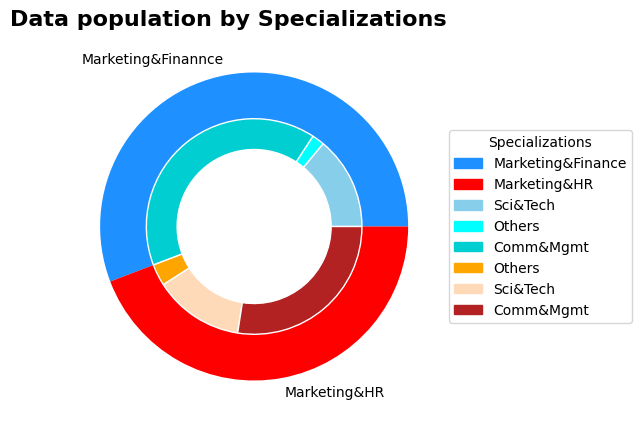

In [96]:
#get the count of students based on their graduate spec and undergraduate degree
major_count = plc_df.groupby(["undergrad_spec","grad_spec"])["placement"].count().unstack()

plt.figure(figsize=(5,5),dpi = 100)

#make the outer pie chart
pie_major = plt.pie([major_count["Marketing&Finannce"].sum(),
                     major_count["Marketing&HR"].sum()],radius= 1, wedgeprops=dict(width=0.3), 
                     colors =['dodgerblue','red'],labels=["Marketing&Finannce","Marketing&HR"])

#make the inner pie chart
pie_major = plt.pie([major_count["Marketing&Finannce"].groupby("undergrad_spec").sum()["Sci&Tech"],
                     major_count["Marketing&Finannce"].groupby("undergrad_spec").sum()["Others"],
                     major_count["Marketing&Finannce"].groupby("undergrad_spec").sum()["Comm&Mgmt"],
                     major_count["Marketing&HR"].groupby("undergrad_spec").sum()["Others"],
                     major_count["Marketing&HR"].groupby("undergrad_spec").sum()["Sci&Tech"],
                     major_count["Marketing&HR"].groupby("undergrad_spec").sum()["Comm&Mgmt"],],
                     colors =['skyblue','cyan','darkturquoise','orange','peachpuff','firebrick'],
                     radius= 0.7, wedgeprops=dict(width=0.2, edgecolor='w'))

#colors and lebels to create dummy object for the legend handles 
colors = ['dodgerblue', 'red', 'skyblue', 'cyan', 'darkturquoise', 'orange', 'peachpuff', 'firebrick']
labels = ["Marketing&Finance", "Marketing&HR", "Sci&Tech", "Others", "Comm&Mgmt", "Others", "Sci&Tech", "Comm&Mgmt"]

#loop to create dummy objects for the legend handles
legend_handles = []
for i in range(8):   
    patch = mpatches.Patch(color=colors[i], label=labels[i])
    legend_handles.append(patch)


plt.legend(handles=legend_handles,title="Specializations", loc="right", bbox_to_anchor=(1, 0, 0.5, 1))
pie_major_title = plt.title("Data population by Specializations",loc="right",fontdict={'fontweight' : 'bold','fontsize': 16})

We can see that surprisingly the majority of the students were employed and offered a job during the campus placement event. 

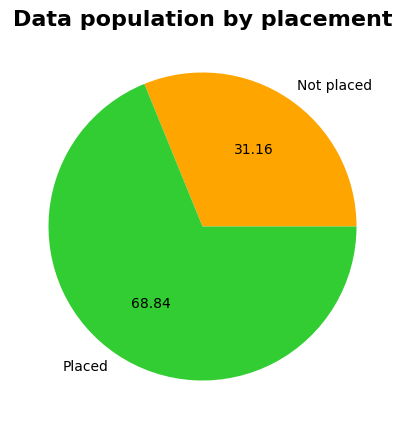

In [97]:
#count of students based on wether they were placed or not
gender_count= plc_df.groupby(["placement"])["work_exp"].count()

plt.figure(figsize=(5,5),dpi = 100)
pie_gender2 = plt.pie(gender_count,labels=["Not placed","Placed"],autopct="%.2f", colors =['orange','limegreen'])
pie_title2 = plt.title("Data population by placement", fontdict={'fontweight' : 'bold','fontsize': 16})

### Gender on Employment

An analysis of the percentage of students that were placed based on their gender reveals that the employment rate of men(72%) is 9% higher than women(63%). However, given such a small sample this is not significant enough to concur a difference between genders. 

In [98]:
#count of students grouped by gender and their placement status
placement_by_gender= plc_df.groupby(["gender", "placement"]).size()
#calculate the percentage of male students that were placed
men_perc_placement = placement_by_gender["M",1]/placement_by_gender["M"].sum()
#calculate the percentage of female students that were placed
women_perc_placement = placement_by_gender["F",1]/placement_by_gender["F"].sum()

print(f"Percantage of men placed is {men_perc_placement}")
print(f"Percantage of women placed is {women_perc_placement}")

Percantage of men placed is 0.7194244604316546
Percantage of women placed is 0.631578947368421


This suggest gender does not affect placement rates. 

### Employability Test Scores On Employment

Employability tests were conducted by the university as a predictor of rates of employment. A side-by-side box plot of placed and not-placed students reveals that placed students have both a larger median and mean for their test scores. 

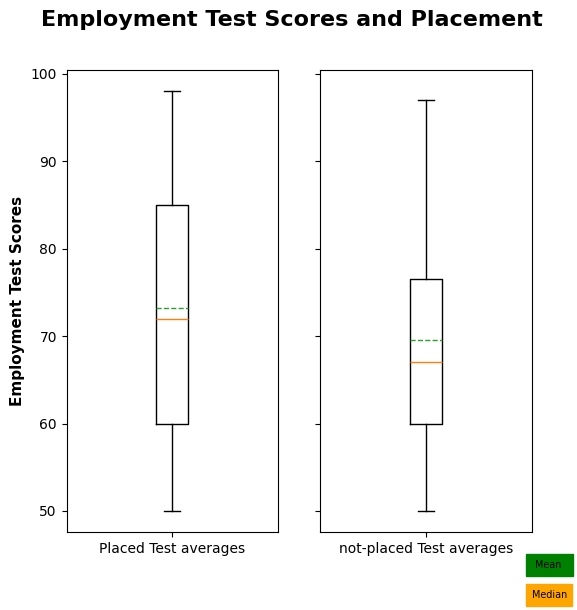

In [99]:
#Employability test scores of students that were placed 
placement_scores = plc_df[plc_df["placement"] ==1]["employ_test"]
#Employability test scores of students that were not placed 
unplaced_scores = plc_df[plc_df["placement"] ==0]["employ_test"]

fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 6),sharey=True)
box1_title = fig.suptitle("Employment Test Scores and Placement",fontsize=16,fontweight="bold")
ax1.set_ylabel('Employment Test Scores',fontdict={'fontweight' : 'bold','fontsize': 11})

#make box plots for placed and not-placed students respectively 
placed_plt = ax1.boxplot(placement_scores,tick_labels=["Placed Test averages"],showmeans=True,meanline=True)
unplacd_plt = ax2.boxplot(unplaced_scores,tick_labels=["not-placed Test averages"],showmeans=True,meanline=True)

#set legends indicatorrs on the side of the graph
txt = fig.text(0.9, 0, f"Median",size='x-small', backgroundcolor="orange", color="black")
txt = fig.text(0.9, 0.05, f' Mean  ',size='x-small', backgroundcolor="green", color='black')

Further numerical analysis of the data, however, reveals that there is only a 5% difference in the average scores and 6% difference in the median between the two groups. 

In [100]:
#get mean for each group
print(f"average marks for placed students: {round(placement_scores.mean(),2)}") 
print(f"average marks for students not placed: {round(unplaced_scores.mean(),2)}")

#get median for each group
print(f"median mark for placed students : {unplaced_scores.median()}")
print(f"median mark for students not placed : {placement_scores.median()}")


average marks for placed students: 73.24
average marks for students not placed: 69.59
median mark for placed students : 67.0
median mark for students not placed : 72.0


This suggests that given the size of our sample, the higher employability test marks are tied to higher rates of employment, albeit not strongly. 

### Graduate Degree Scores on placement

It is often said that our performance in university is tied to our rates of success in finding a job. 

In [101]:
#degree marks of placed students 
placement_degScores = plc_df[plc_df["placement"] ==1]["degree_mark"]
#degree marks of not-placed students 
unplacement_degScores = plc_df[plc_df["placement"] ==0]["degree_mark"]

Evident from the boxplots is that this statement is also for our data set. It can be observed that, both the mean and median of placed students are much larger than those who did not make the placement.

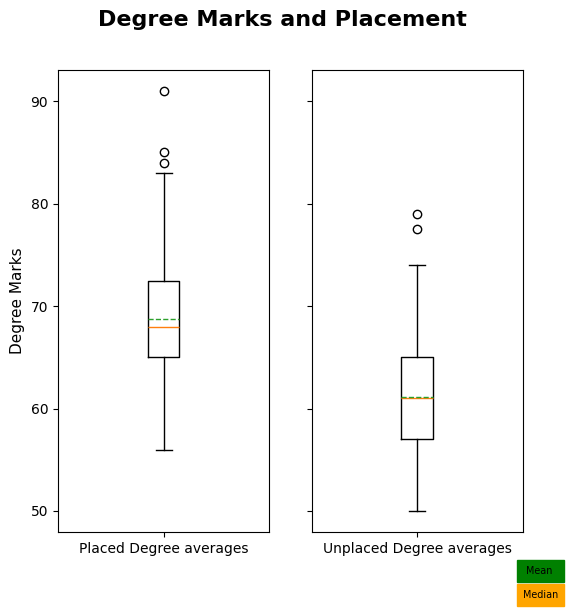

In [102]:

fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 6),sharey=True)
box2_title = fig.suptitle("Degree Marks and Placement",fontsize=16,fontweight="bold")
ax1.set_ylabel('Degree Marks',fontdict={'fontsize': 11})

#make box plots for placed and not-placed students respectively 
placed_plt_dmarks = ax1.boxplot(placement_degScores,tick_labels=["Placed Degree averages"],showmeans=True,meanline=True)
unplaced_plt_dmarks = ax2.boxplot(unplacement_degScores,tick_labels=["Unplaced Degree averages"],showmeans=True,meanline=True)

#set legends indicatorrs on the side of the graph
identifier1  = fig.text(0.9, 0, f"Median",size='x-small', backgroundcolor="orange", color="black")
identifier2 = fig.text(0.9, 0.04, f' Mean  ',size='x-small', backgroundcolor="green", color='black')

This reveals higher marks in your degree are a strong predictor of whether a candidate will be employed during placement. 

### Graduate Specilization on Employment 

Exploring the percentages of students in each specialization that were placed, reveals a much higher percentage of *"Marketing and Finance"* students were employed compared to those specializing *"Marketing and HR"* .

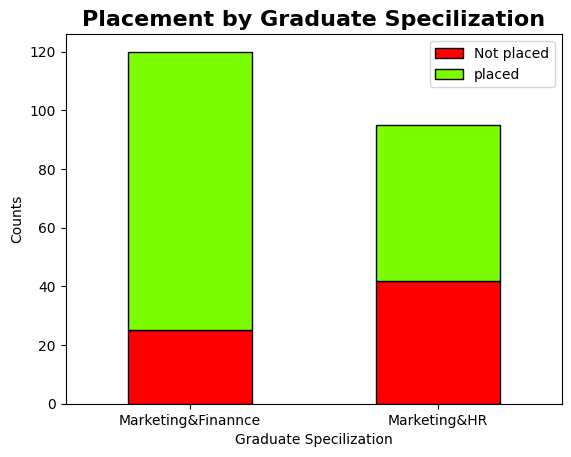

In [103]:
# change boolean to printable formats 
employment_by_specilization = plc_df.replace({"placement" : { 0 : "Not placed", 1 : "placed"}})
#count of placed and not-placed students based on their grad_spec 
employment_by_specilization= employment_by_specilization.groupby(["grad_spec","placement"]).size().unstack()

#make bar plot
bar_plot_grad = employment_by_specilization.plot.bar(stacked=True, color = ["red","lawngreen"],edgecolor=["black"])
plt.title("Placement by Graduate Specilization",fontdict={'fontweight' : 'bold','fontsize': 16})
plt.ylabel("Counts")
plt.xlabel('Graduate Specilization')
plt.xticks(rotation=0)
legends = plt.legend(employment_by_specilization)

This could imply that there are more job opportunities available for *"Marketing and Finance"* students. 

### Job experience On employment 

One of the most talked about factors impacting employment is work experience. 

In [104]:
# change boolean to printable formats 
employment_by_experience = plc_df.replace({"work_exp" : { 0: "No" ,  1: "Yes"}})
employment_by_experience = employment_by_experience.replace({"placement" : { 0 : "Not placed", 1 : "placed"}})

#count of placed and not-placed students based on their work experience  
employment_by_experience= employment_by_experience.groupby(["work_exp","placement"]).size().unstack()

It is evident from the bar graphs that the majority of the students regardless of whether they had experience or not were employed during placement. But, those students with work experience had a much higher rate of placement. 

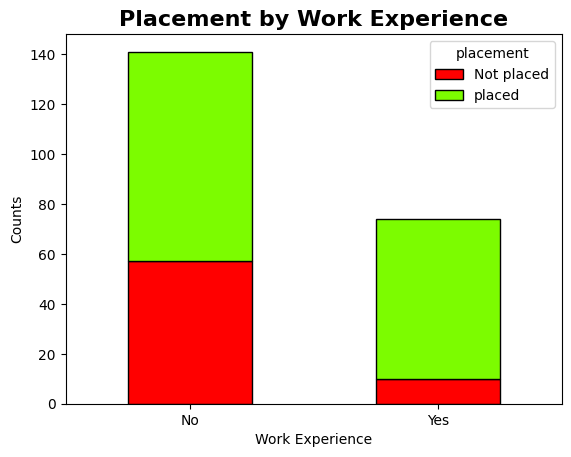

In [105]:
#make bar plot
bar_plot = employment_by_experience.plot.bar(stacked=True, color = ["red","lawngreen"],edgecolor=["black"])
bar_title2= plt.title("Placement by Work Experience",fontdict={'fontweight' : 'bold','fontsize': 16})
bar_y = plt.ylabel("Counts")
bar_y = plt.xlabel("Work Experience")
x_rot = plt.xticks(rotation=0)

This would make work experience one of the strongest predictors of placement.

### Past Marks on Employment 

A histogram of average grade 10 and 12 marks of placed students and those that were not, reveals that the past grades of those students that were placed are larger by a large margin

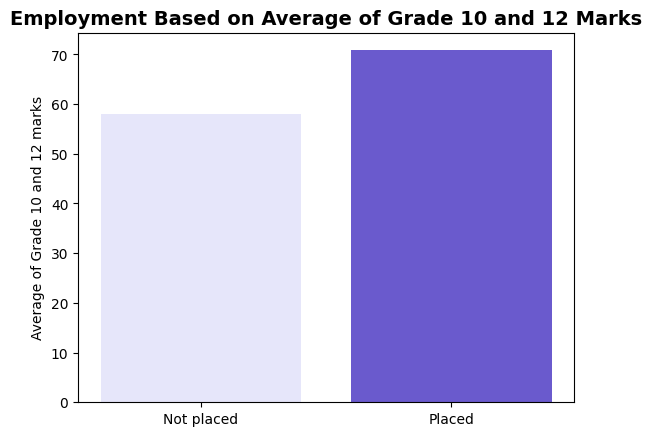

In [106]:
# make a copy of data frame
employment_by_pastGrades = plc_df
#get average grades for grade 10 and 12 for each students 
employment_by_pastGrades["average_grades"] = (employment_by_pastGrades["grade10_mark"]+ employment_by_pastGrades["grade12_mark"])/2
# get the mean of average grade of stundets based on their placement status 
employment_by_pastGrades = employment_by_pastGrades.groupby(["placement"])["average_grades"].mean()
# make a histogram
hist_past_grade = plt.bar(["Not placed","Placed"],employment_by_pastGrades,color= ["lavender","slateblue"])
hist_title = plt.title("Employment Based on Average of Grade 10 and 12 Marks",fontdict = {'fontsize': 14,'fontweight' :'bold'})
y_label = plt.ylabel("Average of Grade 10 and 12 marks")


Therefore grade 10 and 12 marks can be great predictors of placement during campus placement events. This could be due to the fact that high grades in high school can be a sign that a person is diligent and conscientious. 

## Discussion

I explored the data of *MBA(Master of Business Administration)* students at *Jain University Bangalore* and looked for factors and predictors of employment during campus placement events in order to concur on what qualities employers look for in fresh graduates. I found that the strongest predictors of employment were work experience, degree specialization (major), and degree marks. These findings agree with most of the factors people commonly believed to impact employment. There were, however, some unexpected findings. Firstly, the employability test done by the university is a weak indicator of the employment rates. Second was the fact that past grades of students have a large impact on employment rates. This could be due to the fact, that higher high school marks could be an indicator of diligence and thus tied to higher rates of success. 

## References
1. Source data - https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement
2. Pandas for data manipulation
3. Matplotlib for data viz 